In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

plt.rcParams["figure.figsize"] = [5, 3.1]

# Today: Exact solutions and error

Tom Ranner

# Recap

### Differential equation

$$
y'(t) = f(t, y(t)) \quad \text{subject to the initial condition} \quad y(t_0) = y_0.
$$

### Euler's method

1. Set initial values for $t^{(0)}$ and $y^{(0)}$
2. Loop over all time steps, until the final time, updaing using the formulae:

   $$
   \begin{aligned}
   y^{(i+1)} & = y^{(i)} + \mathrm{d}t f(t^{(i)}, y^{(i)}) \\
   t^{(i+1)} & = t^{(i)} + \mathrm{d}t.
   \end{aligned}
   $$

# Exact derivatives and exact solutions

In *some* cases, it is possible to evaluate derivatives of a function exactly.

In *some* cases, we can solve a differential equation *exactly*.

-> This is not what this module is about, but some special cases will help us to test our methods!

## Example 1

Consider the function $y(t) = t^2$.

1. We can plot the function and it's derivative
2. We can compute $y'(t)$ using the definition of a limit

## Example 2

Consider the function $y(t) = t^3$.

Similarly it is quite easy to compute the derivative!

> In general, it can be shown that when $y(t) = a t^m$, then $y'(t) = a m t^{m-1}$.

## Example 3

By working backwards from a known expression for $y(t)$ and $y'(t)$, we can make up our own differential equation that has $y(t)$ as a known solution.

Consider, for example, $y(t) = t^3$, which has $y'(t) = 3 t^2$.

We see that $y(t) = t^3$, is the solution of
$$
y'(t) = \frac{3 y(t)}{t} \quad\text{subject to the initial condition}\quad y(1) = 1.
$$

So, if we solve this differential equation for $t$ between $1$ and $2$, then we know the exact answer when $t = 2$ is $y(2) = 2^3 = 8$.

# Errors in Euler's method

$$
y'(t) = \frac{3 y(t)}{t} \quad\text{subject to the initial condition}\quad y(1) = 1.
$$

Solve this differential equation using Euler's method and check the error at $t = 2$

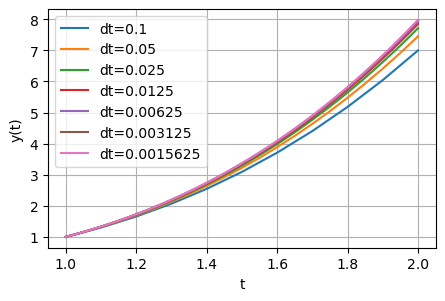

In [4]:
headers = ["n", "dt", "solution", "abs. error", "ratio"]
data = []


def euler(f, n, dt, t0, y0, T):
    t = np.double(t0)
    y = np.double(y0)

    t_, y_ = [t], [y]

    for i in range(n):
        y += dt * f(t, y)
        t += dt

        t_.append(t)
        y_.append(y)

    return t_, y_


t0 = 1.0
y0 = 1.0
T = 2.0


def f(t, y):
    return 3 * y / t


exact = 8.0

old_error = None

for n in [10, 20, 40, 80, 160, 320, 640]:
    dt = (T - t0) / n
    t, y = euler(f, n, dt, t0, y0, T)
    error = abs(y[-1] - exact)
    plt.plot(t, y, label=f"{dt=}")

    if old_error is not None:
        ratio = error / old_error
    else:
        ratio = "---"

    old_error = error

    data.append([n, dt, y[-1], error, ratio])

plt.xlabel("t")
plt.ylabel("y(t)")
plt.grid(True)
plt.legend()

df = pd.DataFrame(data, columns=headers)

## The errors at $t=2$

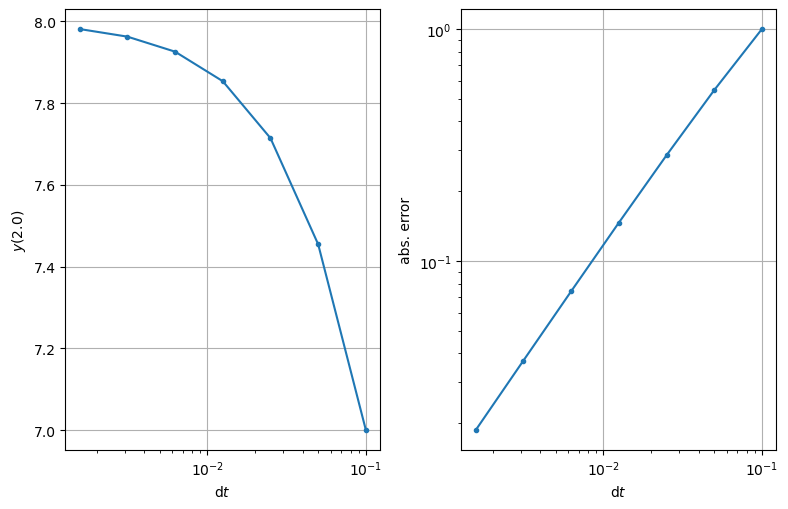

In [12]:
plt.figure(figsize=(8, 5.2))

plt.subplot(1, 2, 1)
plt.semilogx(df["dt"], df["solution"], ".-")
plt.xlabel("$\\mathrm{d}t$")
plt.ylabel("$y(2.0)$")
plt.grid(True)

plt.subplot(1, 2, 2)
plt.loglog(df["dt"], df["abs. error"], ".-")
plt.xlabel("$\\mathrm{d}t$")
plt.ylabel("abs. error")
plt.grid(True)

plt.tight_layout()
plt.show()

In [6]:
df.style.hide_index().set_caption("Results of using Euler's method varying dt")

n,dt,solution,abs. error,ratio
10,0.100000,7.000000,1.000000,---
20,0.050000,7.454545,0.545455,0.545455
40,0.025000,7.714286,0.285714,0.523810
80,0.012500,7.853659,0.146341,0.512195
160,0.006250,7.925926,0.074074,0.506173
320,0.003125,7.962733,0.037267,0.503106
640,0.001563,7.981308,0.018692,0.501558


> Each time $\mathrm{d}t$ is halved the error is halved!?!?!?!?!?!?!?

What might we expect the computed solution to be if we halved $\mathrm{d}t$ one more time?

## Big O Notation

In considering algorithm complexity, you have already seen big O notation. For example:

-   Gaussian elimination requires $O(n^3)$ operations when $n$ is large.
-   Backward substitution requires $O(n^2)$ operations when $n$ is large.

For large values of $n$, the *highest* powers of $n$ are most significant.

For small values of $\mathrm{d}t$, it is the *lowest* power of $\mathrm{d}t$ that are most significant:

- e.g., when $\mathrm{d}t = 0.001$, $\mathrm{d}t$ is much bigger than $(\mathrm{d}t)^2$

We can make use of the "big O" notation in either case.

- For example, suppose $$
  f(x) = 2 x^2 + 4 x^3 + x^5 + 2 x^6,
  $$

    -   then $f(x) = O(x^6)$ as $x \to \infty$
    -   and $f(x) = O(x^2)$ as $x \to 0$.

-   In this notation, we can say that **the error in Euler's method is $O(\mathrm{d}t)$**.

# Improving on Euler's method